In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
from keras.utils import normalize
import cv2 as cv
from PIL import Image
from matplotlib import pyplot as plt
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Dataset/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Dataset/Data/train/image/14.png
/content/drive/MyDrive/Dataset/Data/train/image/37.png
/content/drive/MyDrive/Dataset/Data/train/image/35.png
/content/drive/MyDrive/Dataset/Data/train/image/13.png
/content/drive/MyDrive/Dataset/Data/train/image/15.png
/content/drive/MyDrive/Dataset/Data/train/image/41.png
/content/drive/MyDrive/Dataset/Data/train/image/43.png
/content/drive/MyDrive/Dataset/Data/train/image/42.png
/content/drive/MyDrive/Dataset/Data/train/image/22.png
/content/drive/MyDrive/Dataset/Data/train/image/20.png
/content/drive/MyDrive/Dataset/Data/train/image/16.png
/content/drive/MyDrive/Dataset/Data/train/image/31.png
/content/drive/MyDrive/Dataset/Data/train/image/39.png
/content/drive/MyDrive/Dataset/Data/train/image/45.png
/content/drive/MyDrive/Dataset/Data/train/image/23.png
/content/drive/MyDrive/Dataset/Data/train/image/17.png
/content/drive/MyDrive/Dataset/Data/train/image/47.png
/content/drive/MyDrive/Dataset/Data/train/image/26.png
/content/d

In [ ]:
image_directory_train="/content/drive/MyDrive/Dataset/Data/train/image"
mask_directory_train="/content/drive/MyDrive/Dataset/Data/train/mask"
image_directory_test="/content/drive/MyDrive/Dataset/Data/test/image"
mask_directory_test="/content/drive/MyDrive/Dataset/Data/test/mask"

In [ ]:
SIZE = 256
train_image_dataset = []
train_mask_dataset = []
test_image_dataset = []
test_mask_dataset = []

In [ ]:
train_images = os.listdir(image_directory_train)

In [ ]:
#training images
for i, image_name in enumerate(train_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv.imread(image_directory_train+"/"+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        train_image_dataset.append(np.array(image))

In [ ]:
train_masks = os.listdir(mask_directory_train)
for i, image_name in enumerate(train_masks):
    if (image_name.split('.')[1] == 'png'):
        image = cv.imread(mask_directory_train+"/"+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        train_mask_dataset.append(np.array(image))

In [ ]:
train_image_dataset = np.expand_dims(normalize(np.array(train_image_dataset), axis=1),3)
train_mask_dataset = np.expand_dims((np.array(train_mask_dataset)),3) /255.

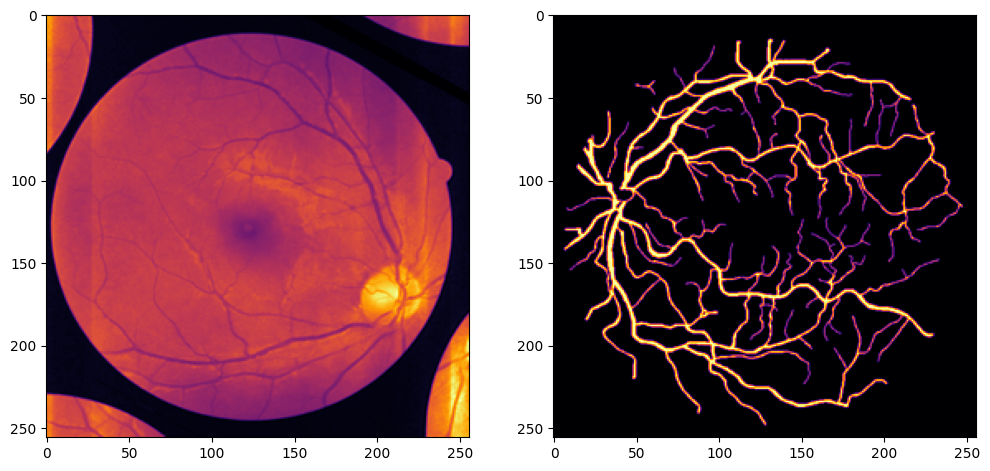

In [ ]:
import random
import numpy as np
image_number = random.randint(0, len(train_image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(train_image_dataset[image_number], (256, 256)),cmap="inferno")
plt.subplot(122)
plt.imshow(np.reshape(train_mask_dataset[image_number], (256, 256)),cmap="inferno")
plt.show()

In [ ]:
test_images = os.listdir(image_directory_test)
test_masks = os.listdir(mask_directory_test)

In [ ]:
for i, image_name in enumerate(test_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv.imread(image_directory_test+"/"+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        test_image_dataset.append(np.array(image))

In [ ]:
for i, image_name in enumerate(test_masks):
    if (image_name.split('.')[1] == 'png'):
        image = cv.imread(mask_directory_test+"/"+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        test_mask_dataset.append(np.array(image))

In [ ]:
test_image_dataset = np.expand_dims(normalize(np.array(test_image_dataset), axis=1),3)
test_mask_dataset = np.expand_dims((np.array(test_mask_dataset)),3) /255.

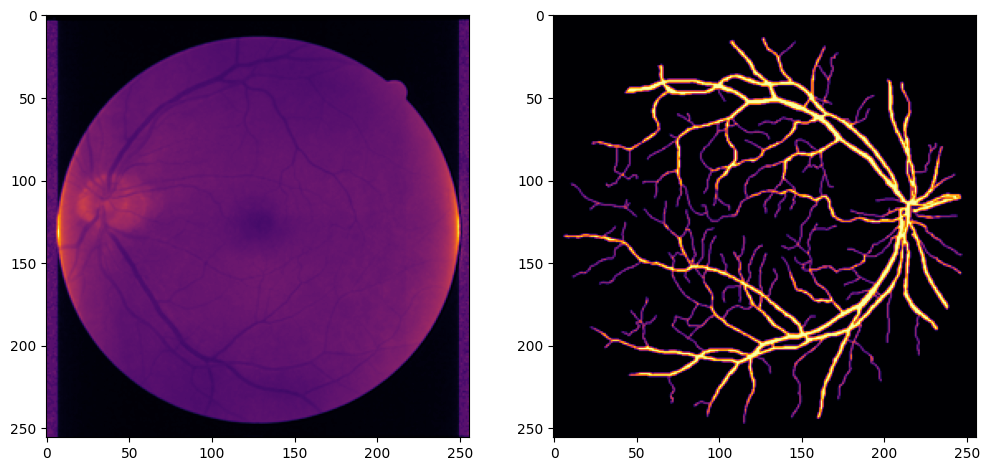

In [ ]:
image_number = random.randint(0, len(test_image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(test_image_dataset[image_number], (256, 256)),cmap="inferno")
plt.subplot(122)
plt.imshow(np.reshape(test_mask_dataset[image_number], (256, 256)),cmap="inferno")
plt.show()

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D,  concatenate, Conv2DTranspose, BatchNormalization, Dropout

In [ ]:
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

In [ ]:
IMG_HEIGHT = train_image_dataset.shape[1]
IMG_WIDTH  = train_image_dataset.shape[2]
IMG_CHANNELS = train_image_dataset.shape[3]

In [ ]:
model= simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         160       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:
history = model.fit(train_image_dataset, train_mask_dataset,
                    batch_size = 32,
                    verbose=1,
                    epochs=50,
                    validation_data=(test_image_dataset, test_mask_dataset),
                    shuffle=False)

Epoch 1/50
3/3 [==============================] - 61s 18s/step - loss: 0.6949 - accuracy: 0.4443 - val_loss: 0.6719 - val_accuracy: 0.8117
Epoch 2/50
3/3 [==============================] - 53s 17s/step - loss: 0.6556 - accuracy: 0.8124 - val_loss: 0.6045 - val_accuracy: 0.8117
Epoch 3/50
3/3 [==============================] - 51s 16s/step - loss: 0.5223 - accuracy: 0.8134 - val_loss: 0.4185 - val_accuracy: 0.8117
Epoch 4/50
3/3 [==============================] - 55s 17s/step - loss: 0.4037 - accuracy: 0.8136 - val_loss: 0.4463 - val_accuracy: 0.8117
Epoch 5/50
3/3 [==============================] - 55s 17s/step - loss: 0.3938 - accuracy: 0.8136 - val_loss: 0.3626 - val_accuracy: 0.8117
Epoch 6/50
3/3 [==============================] - 55s 17s/step - loss: 0.3753 - accuracy: 0.8136 - val_loss: 0.3491 - val_accuracy: 0.8117
Epoch 7/50
3/3 [==============================] - 54s 17s/step - loss: 0.3475 - accuracy: 0.8136 - val_loss: 0.3382 - val_accuracy: 0.8117
Epoch 8/50
3/3 [===========

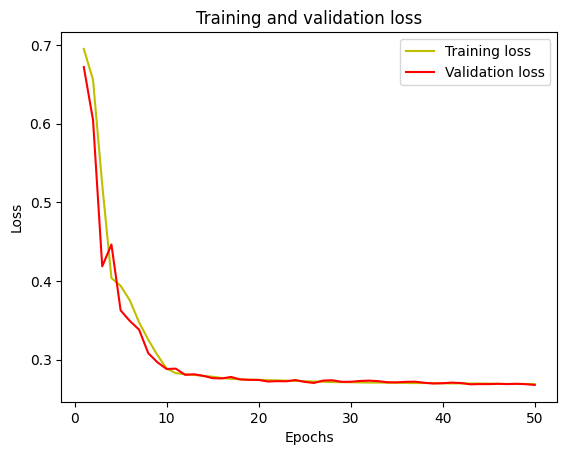

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

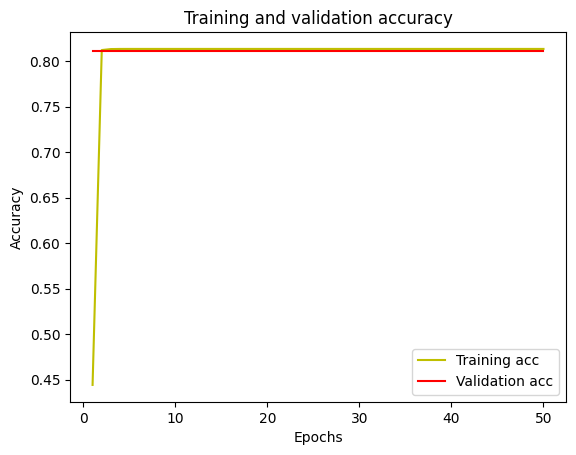

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

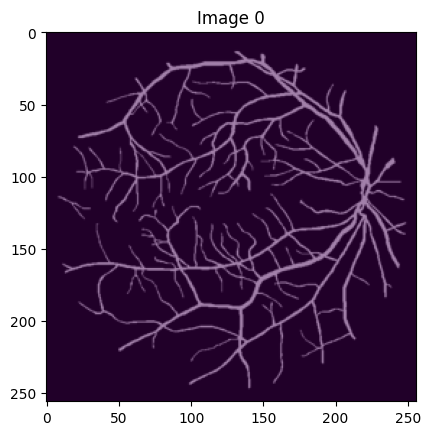

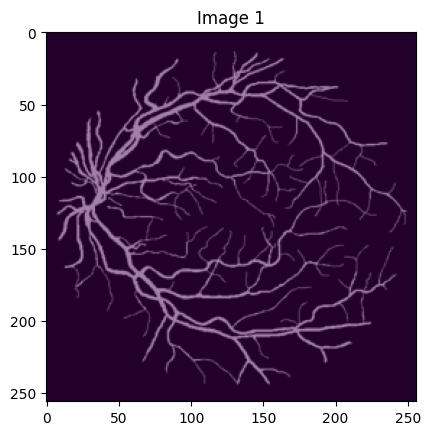

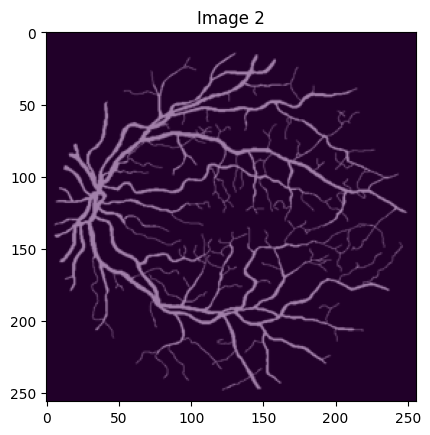

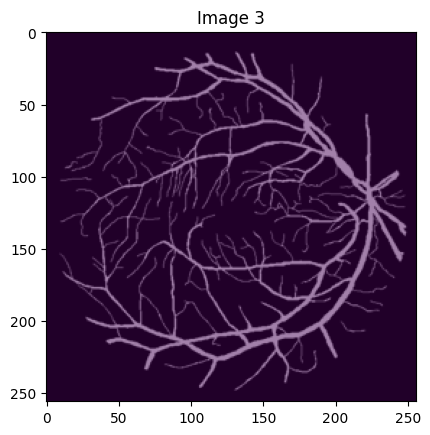

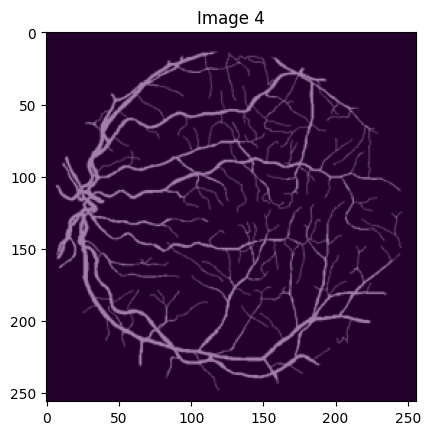

In [ ]:

for i in range(5):
    plt.imshow(test_mask_dataset[i], cmap="gray")
    plt.imshow(y_pred[i][:, :, 0] > 0.5, alpha=0.5)
    plt.title(f"Image {i}")
    plt.show()

In [ ]:
def dice_coefficient(y_true, y_pred):

  y_true_f = y_true.flatten()
  y_pred_f = y_pred.flatten()
  intersection = np.sum(y_true_f * y_pred_f)
  smooth = 1.0
  return (2.0 * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)


In [ ]:
dice_score = dice_coefficient(test_mask_dataset, y_pred_thresholded)
print(f"Dice score with threshold {threshold}: {dice_score}")


Dice score with threshold 0.9: 8.568482165628421e-06
